In [15]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit as cf
import os
import scipy.signal as sig
from scipy.interpolate import UnivariateSpline
from matplotlib.widgets import Slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import sklearn.metrics as metrics
import sys

In [16]:
nr = ['0', '1', '2', '3', '4-1', '4-2', '5', '6', '7', '8-1', '8-2','10', '11', '12-1', '12-2', '14', '15-1', '15-2', '16']

In [17]:
#---------- Dopasowywana funkcja ----------#  
# def kochambiofizyke(x, a, b, c, d):
#     return a*x**3 + b*x**2 + c*x + d

def kochambiofizyke(x, a, b, c, d, e ,f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

#---------- Wybieranie tylko plików z rozszerzeniem .abf ----------#  
files = np.sort(os.listdir('../NOWE_ZAPISY'))
files_names = [n for n in files if '.abf' in n]


#---------- zapisywanie danych z plików do tablic ----------#  
xs = []
ys = []
for i in files_names:
    abf = pyabf.ABF(f'../NOWE_ZAPISY/{i}')
    abf.setSweep(0)
    if np.mean(abf.sweepY) < 0 :
         ys.append(-abf.sweepY)
    else:
        ys.append(abf.sweepY)
    xs.append(abf.sweepX)

ys[0] = ys[0][xs[0]>1.78]
xs[0] = xs[0][xs[0]>1.78]


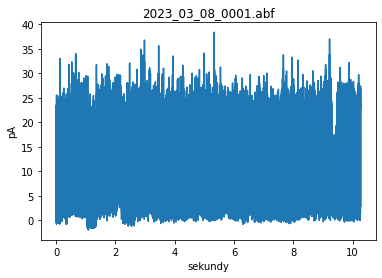

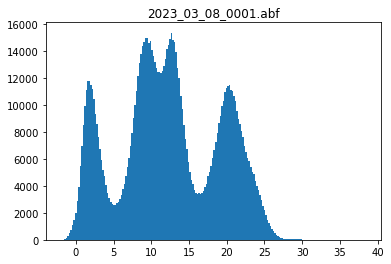

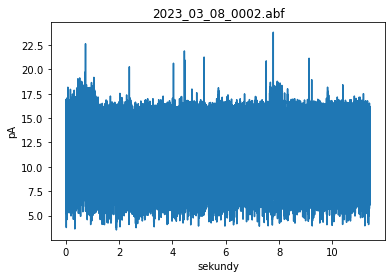

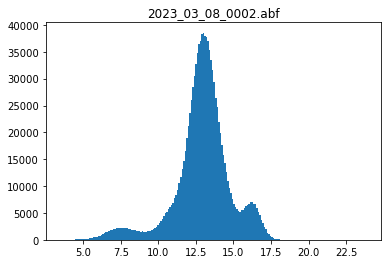

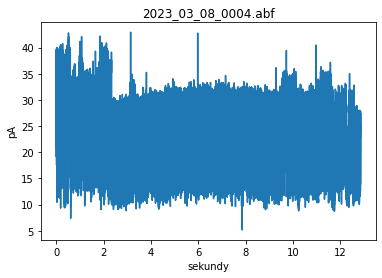

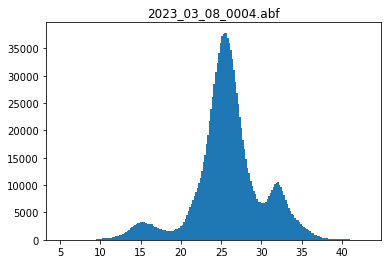

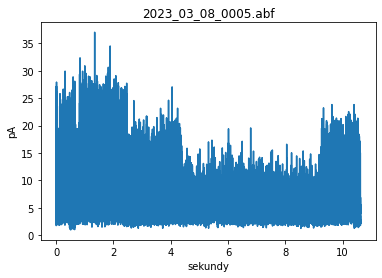

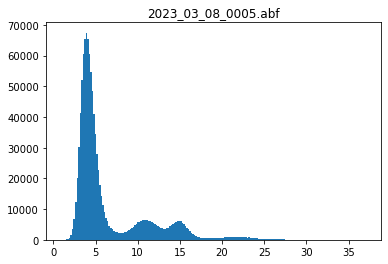

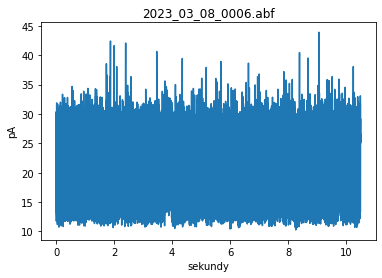

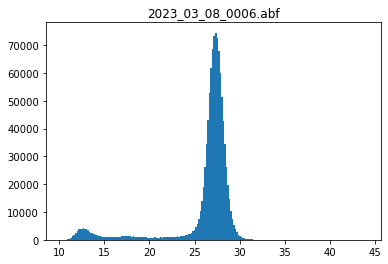

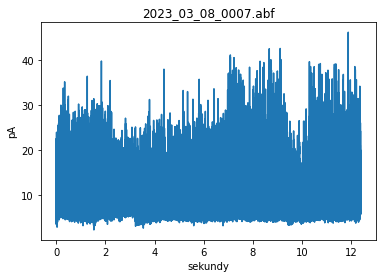

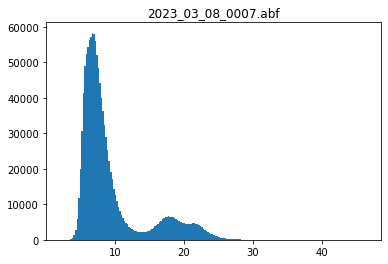

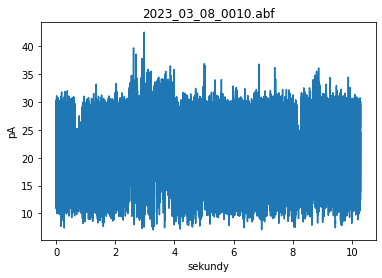

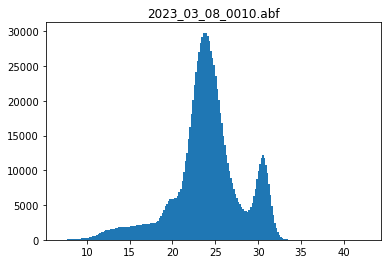

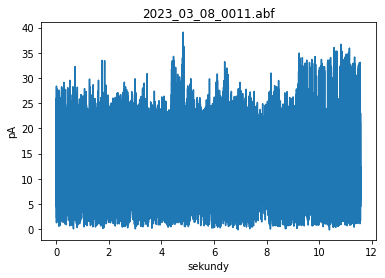

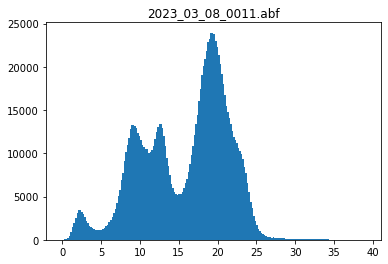

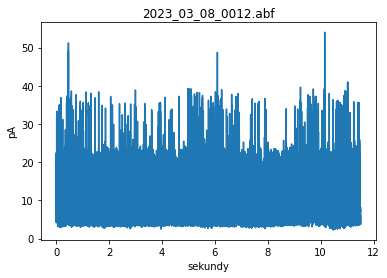

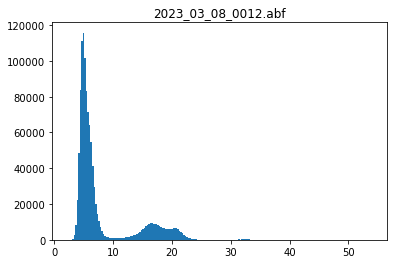

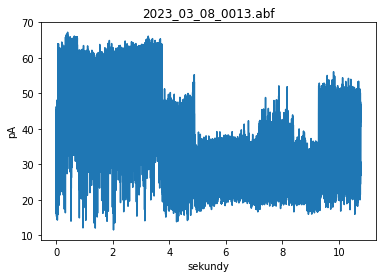

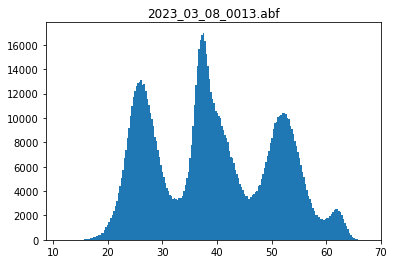

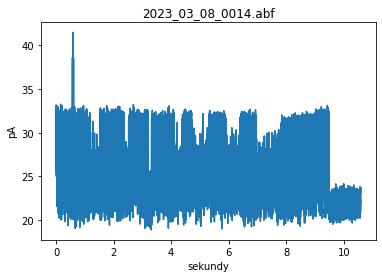

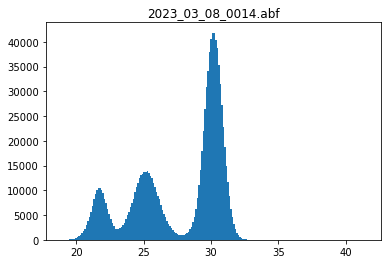

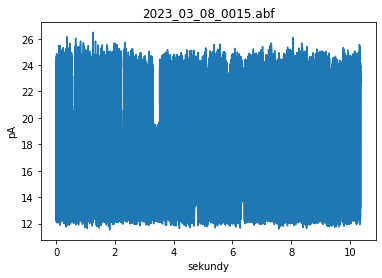

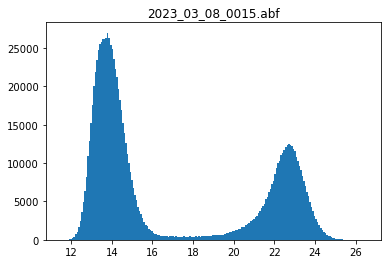

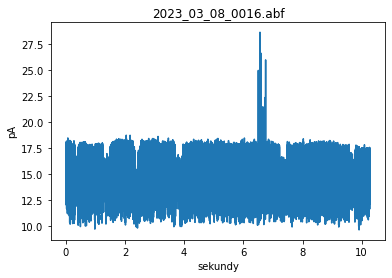

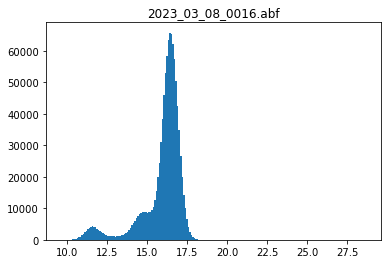

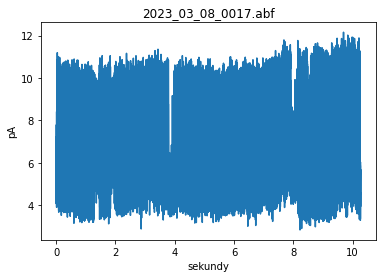

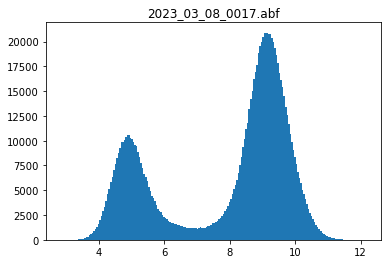

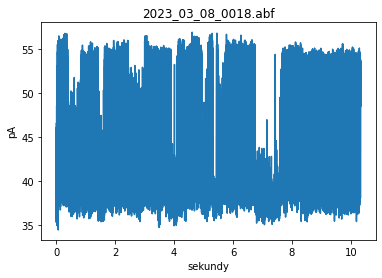

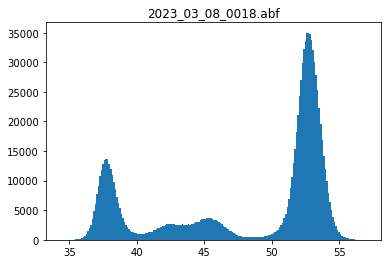

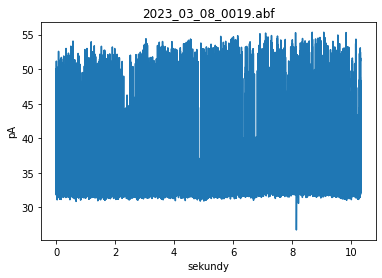

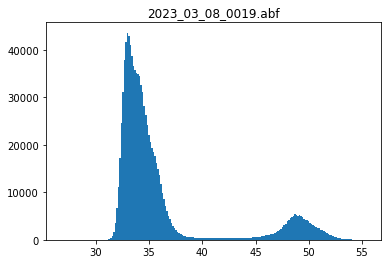

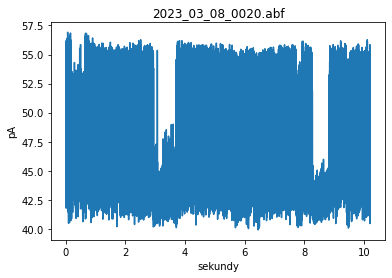

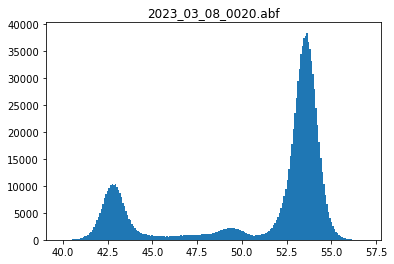

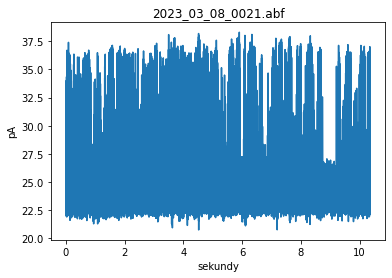

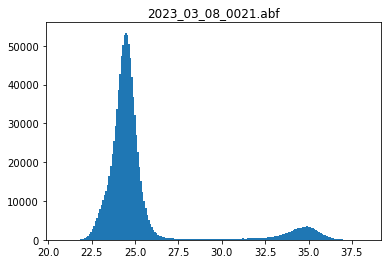

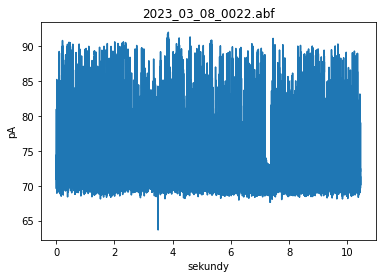

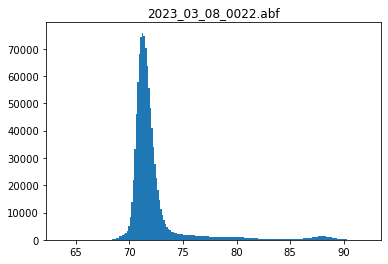

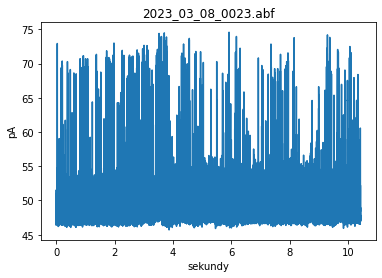

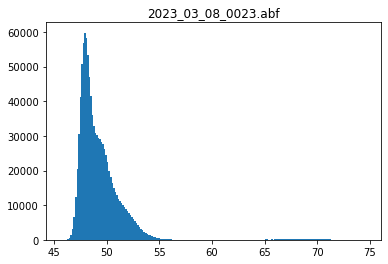

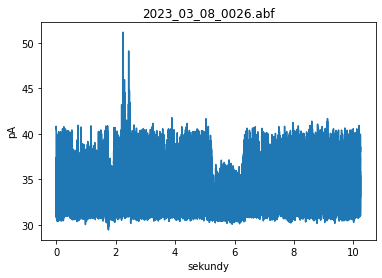

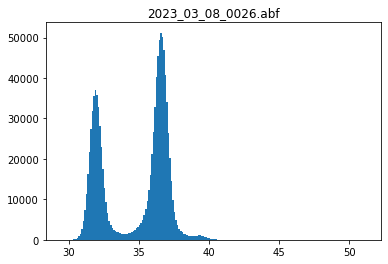

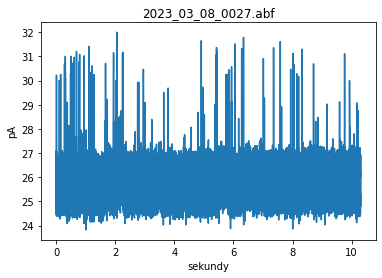

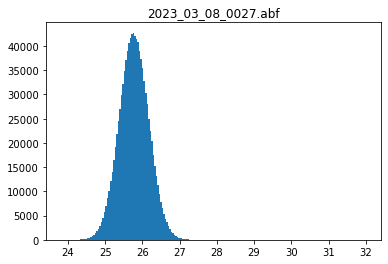

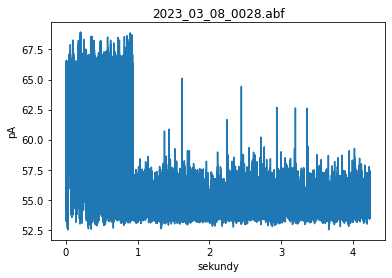

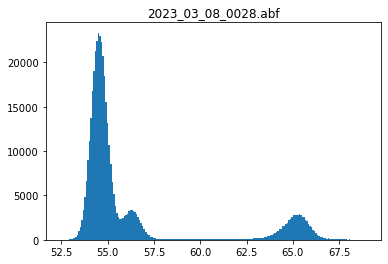

In [18]:
ys1 = []
bins = []
counts = []
left = []
zz = []
for i in range(len(files_names)):

    if i in [0, 3, 8, 9, 24, 25, 29, 30]:
        continue
    x = xs[i]
    y = ys[i]

    for kk in range(100, 200):
        try:
            mins = [np.min(k) for k in np.split(y, kk)]
            xx = np.linspace(0, np.max(x), kk)
            break
        except:
            pass


    z = cf(f=kochambiofizyke, xdata=xx, ydata=mins)[0]


    y1 = y - kochambiofizyke(x, *z) + z[5]
    ys1.append(y1)




    plt.plot(x/10, y1)
    plt.xlabel("sekundy")
    plt.ylabel("pA")
    plt.title(files[i])
    plt.show()

    c, b, _ = plt.hist(y1, bins = 200)

    bins.append(b)
    counts.append(c)
    left.append(i)
    plt.title(files[i])
    plt.show()

In [19]:
sett = 22 # wybor pliku
def plot1(zakres):
    plt.figure(figsize=(27, 10))
    plt.plot(xs[sett], ys1[left.index(sett)])
    plt.xlim(zakres, zakres+4)

interact(plot1, zakres = widgets.FloatSlider(value=70,
                                               min=0,
                                               max=xs[sett][-1]-1,
                                               step=0.4) )
plt.show()

interactive(children=(FloatSlider(value=70.0, description='zakres', max=103.49990000000001, step=0.4), Output(…

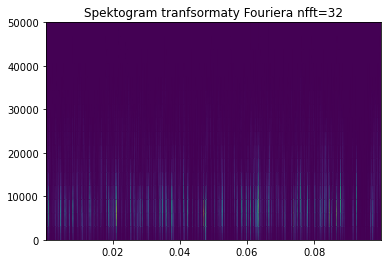

In [20]:
n = 16 # do npersega i nfft

f_spect, t_spect, Sxx = sig.spectrogram(ys[3][700000:710000], fs = 100000, window='hamming', nperseg = n , nfft = 2*n)
plt.pcolormesh(t_spect, f_spect, Sxx, shading='gouraud')
plt.title("Spektogram tranfsormaty Fouriera nfft=32")
plt.show()

In [21]:
#---------- Repeat period ----------#  
level = 10 # poziom 30 przykładowo dla sett 3
sett = 3
points = []
for i in range(len(xs[sett])-1):
    if ys[sett][i] > level and ys[sett][i+1] < level:
        points.append(xs[sett][i+1]) 


#---------- Burst ----------#
points_diff = np.diff(points)
pd_mean = 2*np.mean(points_diff)
burst_bound = [0]
burst = [points[0]]

for i in range(1, len(points_diff)-1):
    if points_diff[i+1] < pd_mean and points_diff[i-1] < pd_mean:    
        if points_diff[i] > 0.1:
            burst_bound.append(i)
            burst_bound.append(i+1)
            burst.append(points[i])
            burst.append(points[i+1])
burst_bound.append(len(points)-1)
burst.append(points[-1])
len(burst_bound)

22

In [22]:


def plot2(zakres2):
    plt.figure(figsize=(20, 10))
    plt.xlim(zakres2, zakres2+1)
    plt.plot(points, np.full(len(points),level),'.')
    plt.plot(burst, np.full(len(burst),level),c = 'r', marker = 'o', linestyle='')

interact(plot2, zakres2 = widgets.FloatSlider(value=0,
                                               min=0,
                                               max=xs[sett][-1]-1,
                                               step=0.1) )



interactive(children=(FloatSlider(value=0.0, description='zakres2', max=105.6499), Output()), _dom_classes=('w…

<function __main__.plot2(zakres2)>

In [23]:
points_diff = np.diff(points)
pd_mean = 2*np.mean(points_diff)
burst_bound = [0]
burst = [points[0]]

for i in range(1, len(points_diff)-1):
    if points_diff[i+1] < pd_mean and points_diff[i-1] < pd_mean:    
        if points_diff[i] > 0.1:
            burst_bound.append(i)
            burst_bound.append(i+1)
            burst.append(points[i])
            burst.append(points[i+1])
burst_bound.append(len(points)-1)
burst.append(points[-1])
len(burst_bound)


22

(0.0, 0.1)

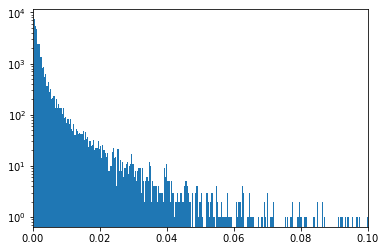

In [24]:
counts1, bins1, _ = plt.hist(points_diff, bins = 3000,log=True)
plt.xlim(0, right=0.1)

/var/folders/3q/_r0r_mr54yjf1592srdbg7q80000gn/T/ipykernel_37027/2247511982.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(bins1[:-1],np.log(counts1))


(0.0, 0.1)

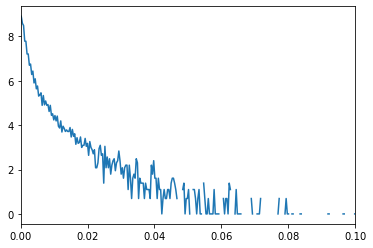

In [25]:
plt.plot(bins1[:-1],np.log(counts1))
plt.xlim(0, right=0.1)
#plt.ylim(bottom = 1)


/var/folders/3q/_r0r_mr54yjf1592srdbg7q80000gn/T/ipykernel_37027/2829989267.py:13: RuntimeWarning: divide by zero encountered in log
  y_h = np.log(counts1[:it])


(0.0, 0.1)

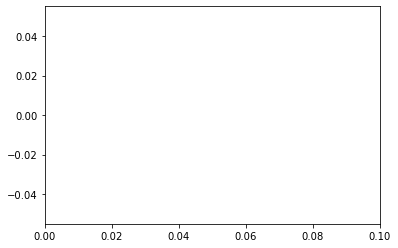

In [26]:
# x_h = bins[:-1]
# y_h = np.where(counts > 0.0000000001, counts, -10)
# a,b = np.polyfit(x_h, np.log(y_h, out=y_h, where=y_h > 0),1)
def find_iterator(y):
    b = 0
    for i in range(len(y)):
        if np.log(y[i],where = 0) :
            b = i
    return b

it = find_iterator(counts1)
x_h = bins1[:it]
y_h = np.log(counts1[:it])
a,b = np.polyfit(x_h, y_h,1)
plt.plot(x_h, x_h*a+b)
plt.xlim(0, right=0.1)

[ 18  55  72 110]


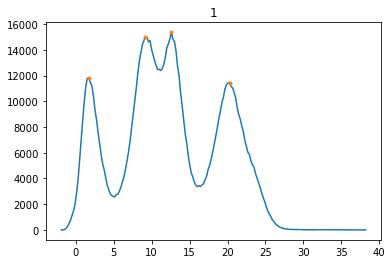

[ 38  93 125]


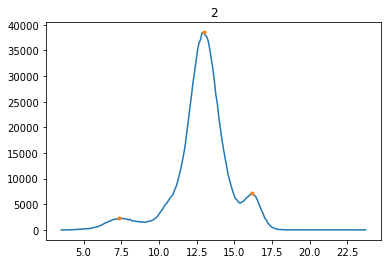

[ 52 107 142]


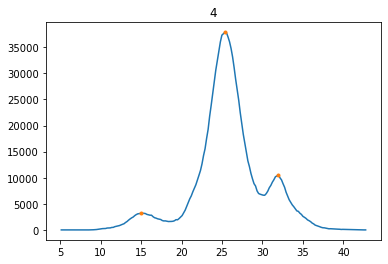

[16 54 77]


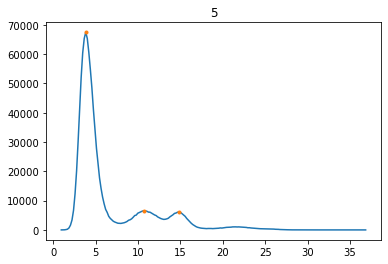

[ 14 101]


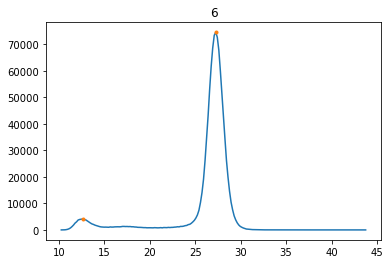

[20 70]


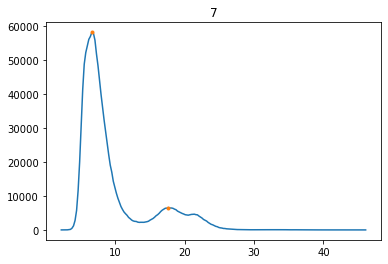

[ 93 132]


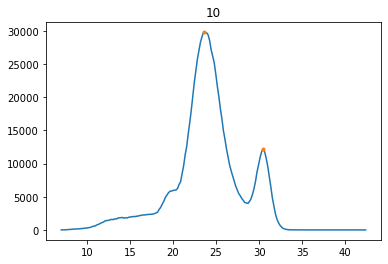

[12 47 65 99]


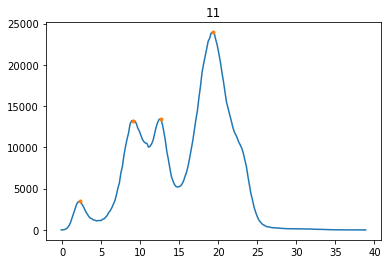

[10 55]


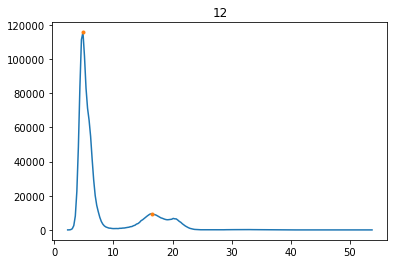

[ 52  93 145 180]


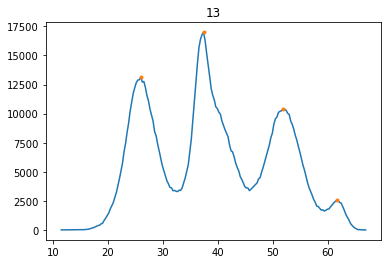

[25 56 99]


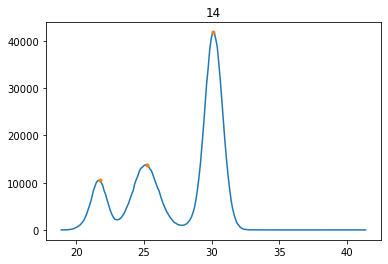

[ 30 149]


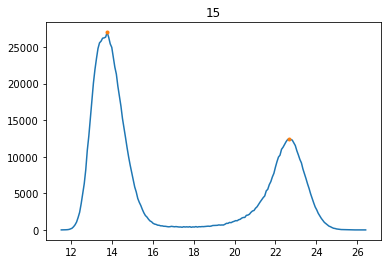

[20 71]


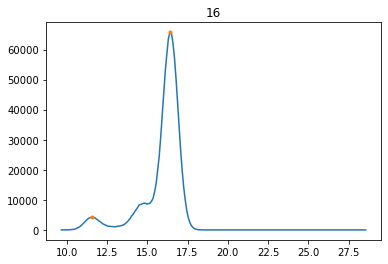

[ 44 135]


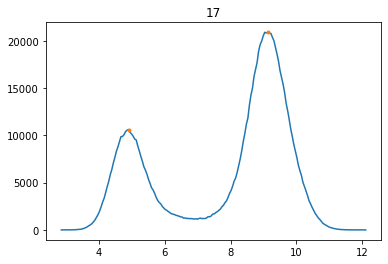

[ 29  96 162]


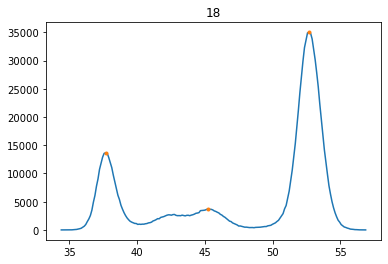

[ 43 153]


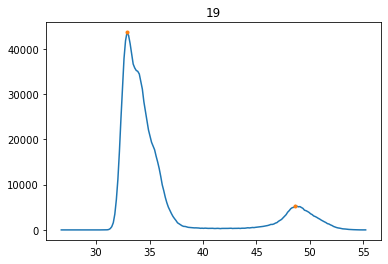

[ 33 110 161]


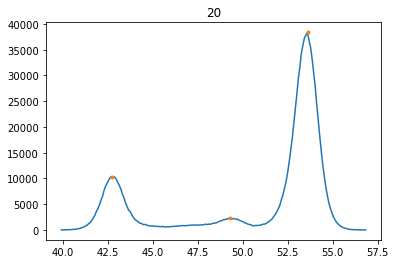

[ 42 161]


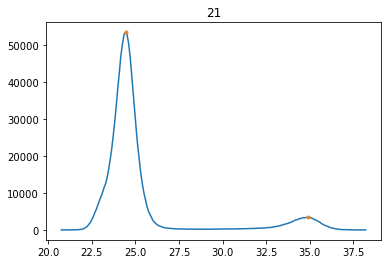

[53]


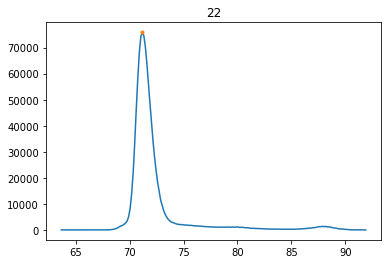

[15]


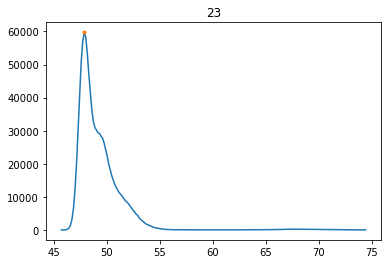

[22 65]


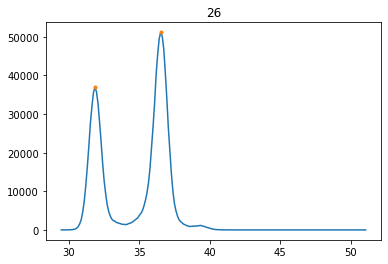

[47]


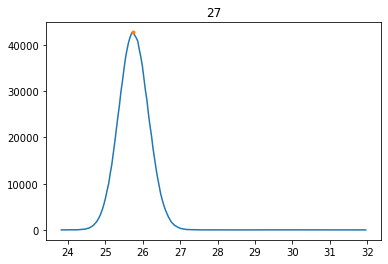

[ 24  46 156]


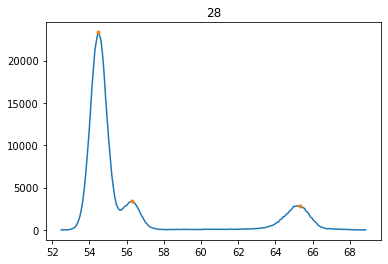

[ 52  93 145 180]
[ 52  93 145]


In [27]:
peaks = []
left_tmp = left.copy()
left = []
for di, i in enumerate(left_tmp):
    #if i != 9 and i != 13:
    if True:
        k ,_,= sig.find_peaks(counts[di],height=2000, width=4)
        # if i == 2 or i == 4:
        #     print(k)
        #     k = np.delete(k,1)
        peaks.append(k)
        print(k)
        plt.plot(bins[di][:-1],counts[di])
        plt.plot(bins[di][k], counts[di][k], '.')
        plt.title(f'{i}')
        plt.show()
    left.append(i)
        
    # print(k)
    # plt.plot(bins[i][:-1],counts[i])
    # plt.plot(bins[i][k], counts[i][k], '.')
    # plt.title(f'{i}')
    # plt.show()

# np.delete(peaks[2], 1)
# np.delete(peaks[4], 1)
# 9 i 13 do wywalenia
print(peaks[left.index(13)])
peaks[left.index(13)] = np.delete(peaks[left.index(13)], 3)
peaks[left.index(18)] = np.delete(peaks[left.index(18)], 1)
peaks[left.index(20)] = np.delete(peaks[left.index(20)], 1)
peaks[left.index(28)] = np.delete(peaks[left.index(28)], 1)

print(peaks[left.index(13)])

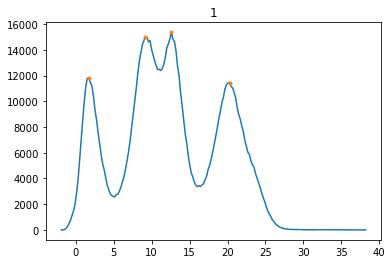

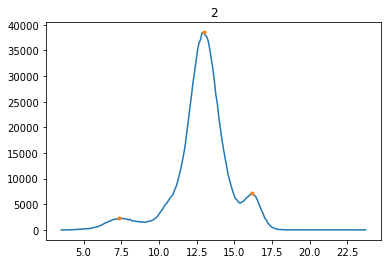

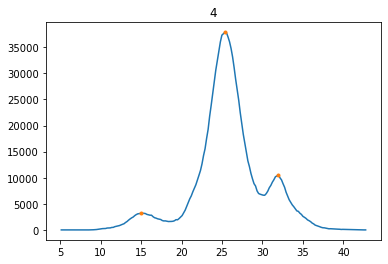

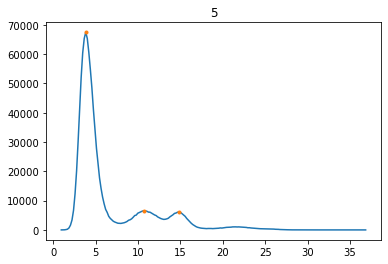

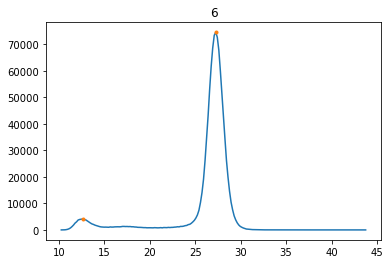

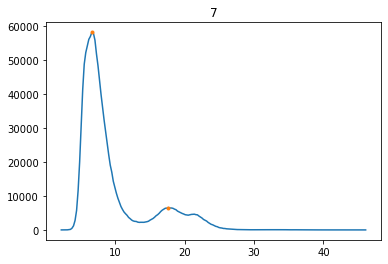

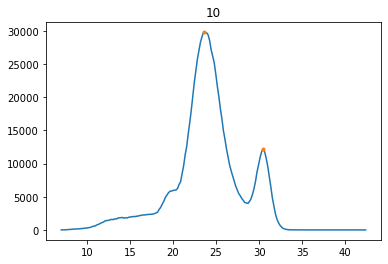

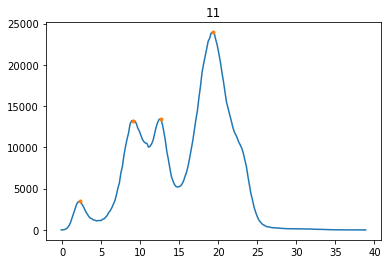

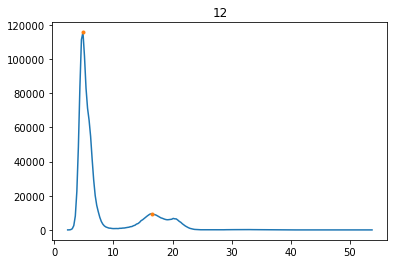

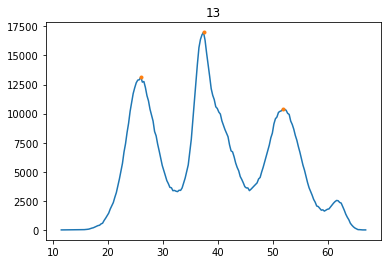

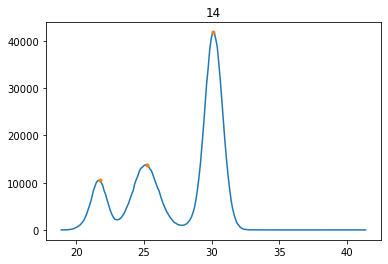

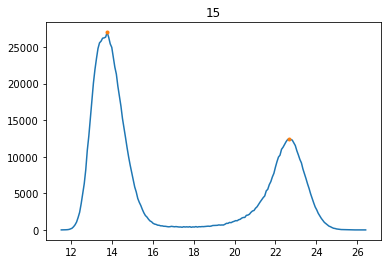

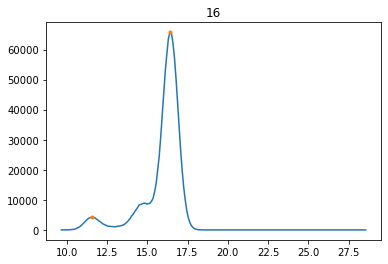

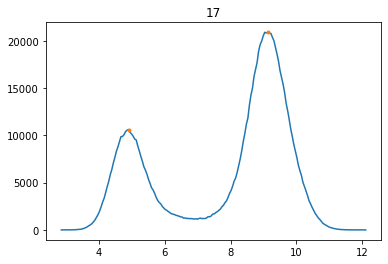

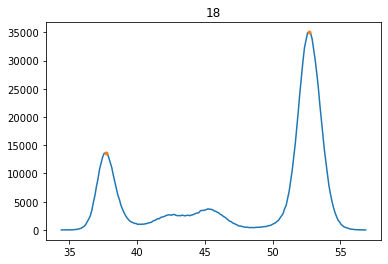

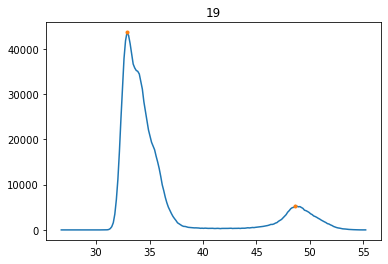

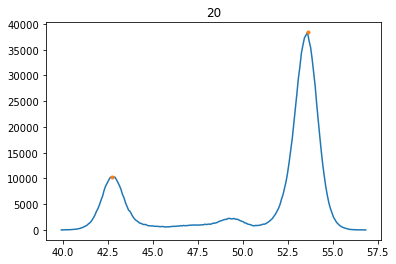

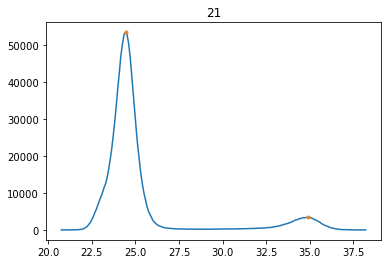

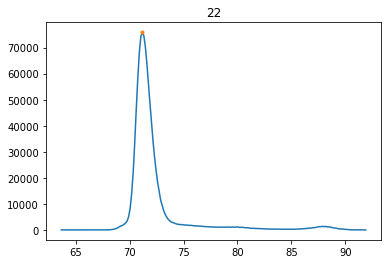

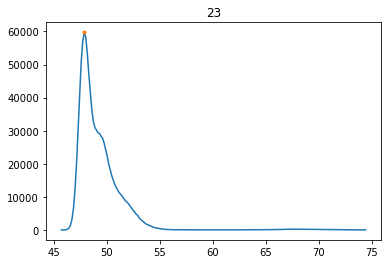

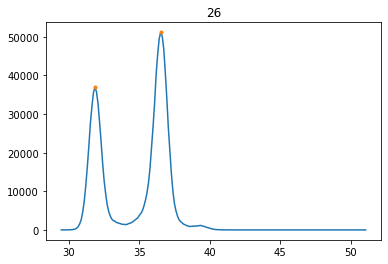

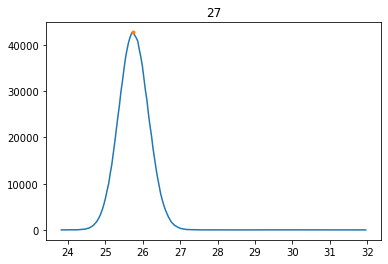

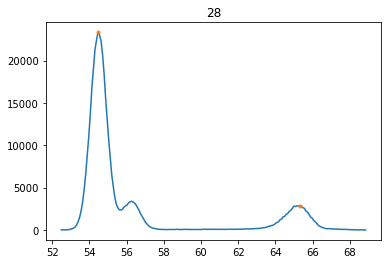

In [28]:
for di, i in enumerate(left):
    #if i != 9 and i != 13:
    if True:
        plt.plot(bins[di][:-1],counts[di])
        plt.plot(bins[di][peaks[left.index(i)]], counts[di][peaks[left.index(i)]], '.')
        plt.title(f'{i}')
        plt.show()


In [29]:
# #---------- Repeat period ----------#  
# level = 32 # poziom 30 przykładowo dla sett 3
# sett = 3
# points = []
# for i in range(len(xs[sett])-1):
#     if ys[sett][i] > level and ys[sett][i+1] < level:
#         points.append(xs[sett][i+1]) 

burst_points = []
for i,x in enumerate(peaks):
    tablica = []
    for j in range(len(np.array(peaks[i]))-1): 
        level = (bins[i][peaks[i][j]]+bins[i][peaks[i][j+1]])/2
    # print(len(level))
        for z in range(len(ys[i])-1):
            if ys[i][z] > level and ys[i][z+1] < level:
                tablica.append(xs[i][z+1])
        burst_points.append(tablica)       
    print(f'{i+1}/{len(peaks)}')
    

1/23
2/23
3/23
4/23
5/23
6/23
7/23
8/23
9/23
10/23
11/23
12/23
13/23
14/23
15/23
16/23
17/23
18/23
19/23
20/23
21/23
22/23
23/23


In [30]:
len(burst_points)

29

In [31]:
burst_points[16]

[0.5541,
 2.0313,
 3.1931000000000003,
 3.9267000000000003,
 3.9369,
 4.8907,
 4.891100000000001,
 4.891500000000001,
 4.892,
 4.8925,
 4.8927000000000005,
 4.8941,
 7.323300000000001,
 7.4907,
 8.1753,
 8.257100000000001,
 8.6365,
 9.4563,
 9.457,
 9.4579,
 9.459,
 9.460600000000001,
 9.4611,
 9.4616,
 9.4625,
 9.4634,
 9.463700000000001,
 9.4657,
 9.466000000000001,
 9.466800000000001,
 9.4674,
 9.4689,
 9.469800000000001,
 9.4702,
 9.4716,
 9.4725,
 9.4733,
 9.5067,
 9.5122,
 9.5149,
 9.5396,
 9.5419,
 9.5488,
 9.5501,
 9.5716,
 9.5855,
 9.6195,
 9.6201,
 9.6255,
 9.6362,
 9.6651,
 9.7149,
 9.7254,
 9.738800000000001,
 9.7476,
 9.763200000000001,
 9.7707,
 9.7745,
 9.7814,
 9.7825,
 9.7829,
 9.7885,
 9.794400000000001,
 9.8003,
 9.815800000000001,
 9.8301,
 9.8777,
 9.8904,
 9.8911,
 9.902800000000001,
 9.9068,
 9.930900000000001,
 9.9356,
 9.9619,
 9.969800000000001,
 9.9708,
 9.9845,
 9.9867,
 9.9944,
 9.9959,
 9.997900000000001,
 10.0107,
 10.014700000000001,
 10.0263,
 10.039100

In [32]:
# points_diff = np.diff(points)
# pd_mean = 2*np.mean(points_diff)
# burst_bound = [0]
# burst = [points[0]]

# for i in range(1, len(points_diff)-1):
#     if points_diff[i+1] < pd_mean and points_diff[i-1] < pd_mean:    
#         if points_diff[i] > 0.1:
#             burst_bound.append(i)
#             burst_bound.append(i+1)
#             burst.append(points[i])
#             burst.append(points[i+1])
# burst_bound.append(len(points)-1)
# burst.append(points[-1])
# len(burst_bound)


w = 2e-03
bins_width = []
burst_points_diff = []
for i in range(len(burst_points)):
    try:
        difference = np.diff(burst_points[i])
        burst_points_diff.append(difference)
        bins_width.append((max(burst_points_diff[i])-min(burst_points_diff[i]))/w)
    except:
        bins_width.append(0)


In [33]:
bins_width

[94541.7,
 94541.7,
 94541.7,
 51461.700000000004,
 51461.700000000004,
 11653.449999999999,
 11653.449999999999,
 57144.0,
 57144.0,
 287.35000000001065,
 1021.7000000000027,
 370.900000000006,
 62746.450000000004,
 62746.450000000004,
 62746.450000000004,
 0,
 86317.0,
 86317.0,
 52630.350000000006,
 52630.350000000006,
 152.90000000000248,
 186.75000000000352,
 0,
 0,
 0,
 0,
 0,
 681.6500000000048,
 827.6000000000039]

In [34]:
counts_burst = []
bins_burst = []

for i in range(len(burst_points)):
    if  bins_width[i]:
        burst_points_diff.append(np.diff(burst_points[i]))
        countsbb, binsbb = np.histogram(burst_points_diff[i], bins = int(bins_width[i]))
        counts_burst.append(countsbb)
        bins_burst.append(binsbb)
    else:
        counts_burst.append(0)
        bins_burst.append(0)
        # plt.xlim(0, right = 0.5)
    

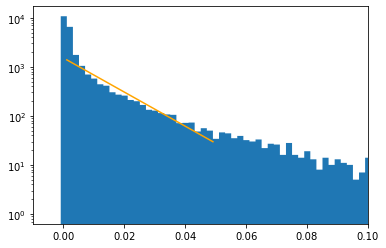

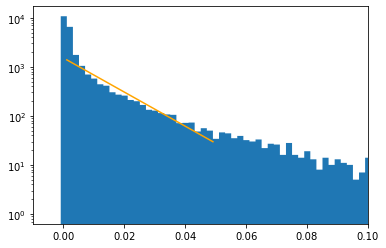

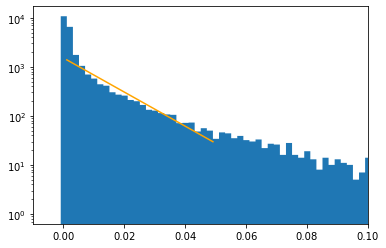

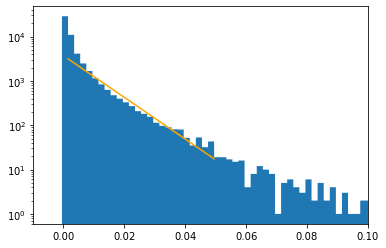

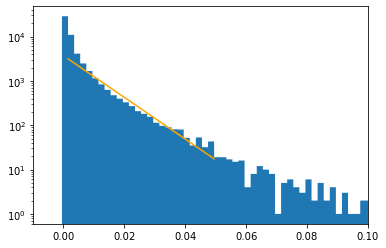

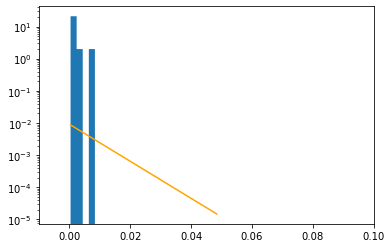

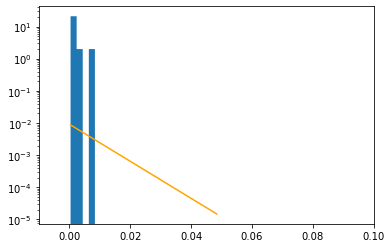

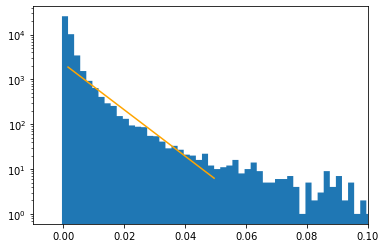

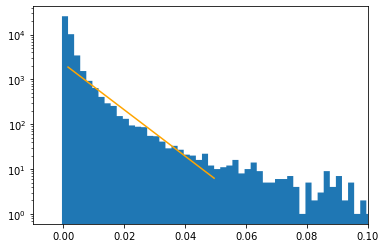

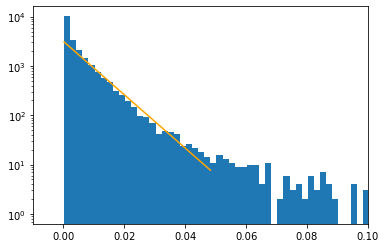

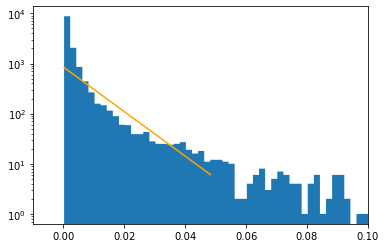

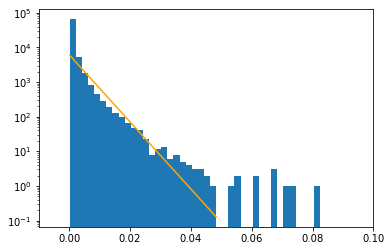

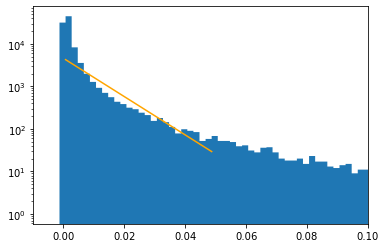

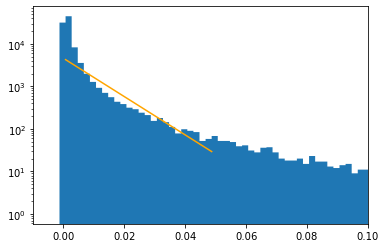

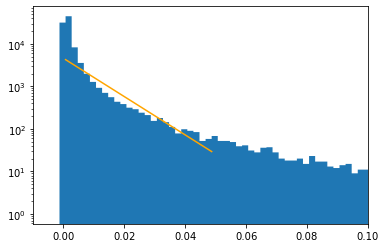

15


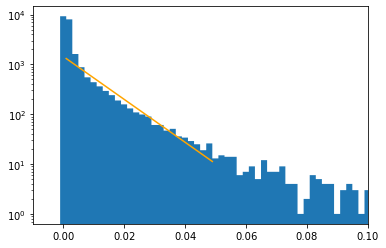

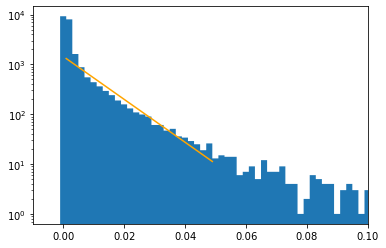

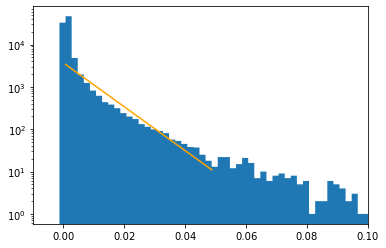

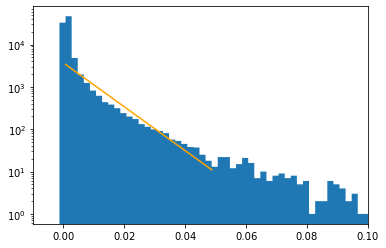

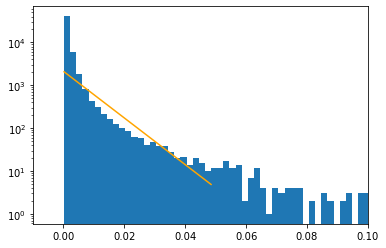

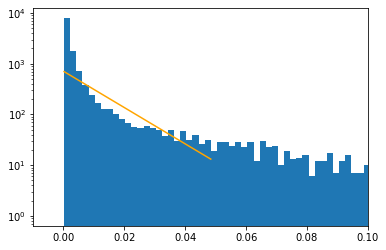

22
23
24
25
26


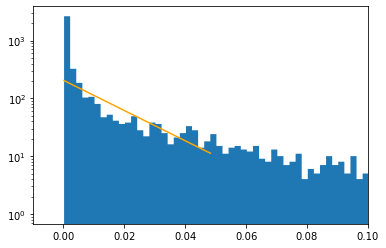

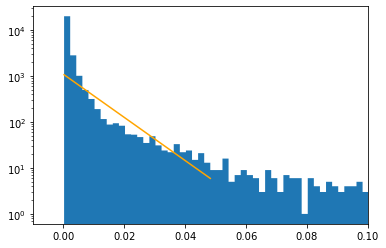

In [35]:
# it = find_iterator(counts1)
# x_h = bins1[:it]
# y_h = np.log(counts1[:it])
# a,b = np.polyfit(x_h, y_h,1)
# plt.plot(x_h, x_h*a+b)
# plt.xlim(0, right=0.1)

iter = []
ass = []
bss = []
r2 = []
resids = []
for i in range(len(counts_burst)):
    try:
        war = bins_burst[i][:-1]>=0
        new_arr_x = bins_burst[i][:-1][war]
        new_arr_y = counts_burst[i][war]
        final_arr_x = new_arr_x[new_arr_x<0.05]
        final_arr_y = new_arr_y[new_arr_x<0.05]

        plt.stairs(counts_burst[i], bins_burst[i], fill=True)
        plt.yscale('log')
        plt.xlim(left = -0.01, right=0.1)
        a,resid,_, _, _ = np.polyfit(final_arr_x, np.log(final_arr_y+0.0001), 1, full=True)
        resids.append(resid[0])
        ass.append(a)
        bss.append(b)
        plt.plot(final_arr_x, np.exp(final_arr_x*a[0] + a[1]), color = "orange")
        r2.append(metrics.r2_score(final_arr_y, np.exp(final_arr_x*a[0] + a[1])))
        plt.show()
    except:
        print(i)

In [36]:
for i in np.round(resids, 2):
    print(i)

3.78
3.78
3.78
3.61
3.61
213.6
213.6
6.88
6.88
3.23
12.51
76.26
10.27
10.27
10.27
5.03
5.03
10.09
10.09
17.51
12.29
11.42
17.09


In [37]:
for dx, i in enumerate(np.round(r2, 2)):
    print(f'{dx}    -   {i} -   {np.round(resids[dx], 2)}')

0    -   0.34 -   3.78
1    -   0.34 -   3.78
2    -   0.34 -   3.78
3    -   0.49 -   3.61
4    -   0.49 -   3.61
5    -   -0.06 -   213.6
6    -   -0.06 -   213.6
7    -   0.31 -   6.88
8    -   0.31 -   6.88
9    -   0.51 -   3.23
10    -   0.13 -   12.51
11    -   0.13 -   76.26
12    -   0.13 -   10.27
13    -   0.13 -   10.27
14    -   0.13 -   10.27
15    -   0.26 -   5.03
16    -   0.26 -   5.03
17    -   0.09 -   10.09
18    -   0.09 -   10.09
19    -   0.05 -   17.51
20    -   0.12 -   12.29
21    -   0.08 -   11.42
22    -   0.05 -   17.09
